# Regression Models

In [13]:
# Import polynomial features & linear regression modules
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# import pipleline to combine polyomical features & linar regression
from sklearn.pipeline import make_pipeline

In [14]:
# Polynomial regression function
def PolynomialRegression(degree=1,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [15]:
# Make data
import numpy as np
def make_data(N,err=1.0,rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N,1) ** 2
    y = 10 - 1.0/(X.ravel()+0.1)
    if err > 0:
        y += err * rng.rand(N)
    return X, y

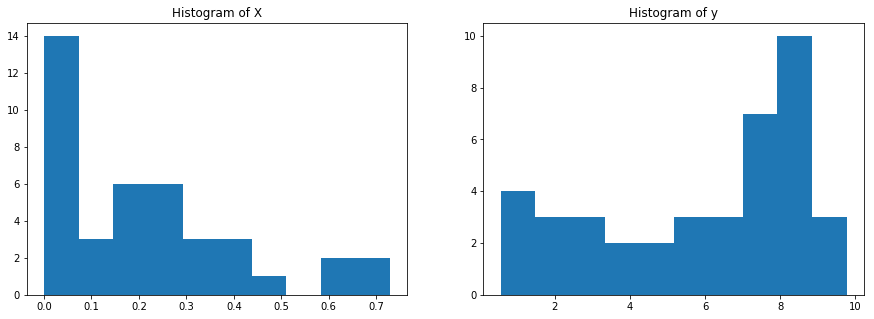

In [16]:
import matplotlib.pyplot as plt
X,y=make_data(40,rseed=2)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(X)
plt.title('Histogram of X')
plt.subplot(1,2,2)
plt.hist(y)
plt.title('Histogram of y')
plt.show()

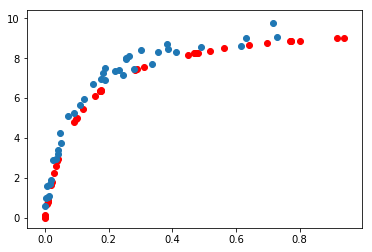

In [17]:
# Data without noise in y
X_true,y_true = make_data(N=40,err=0.0,rseed=1)
plt.scatter(X_true,y_true,color='red')
plt.scatter(X,y)

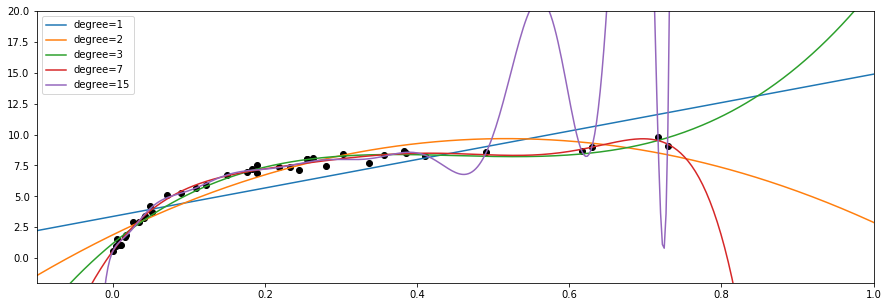

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.figure(figsize=(15,5))
plt.scatter(X.ravel(), y, color='black')

for degree in [1,2,3,7,15]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 20)
plt.legend(loc='best');

### Validation Curve

(-1, 20)

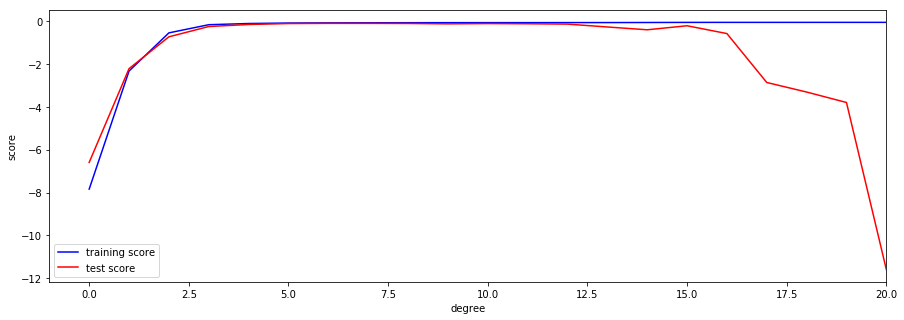

In [19]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0,21)
train_score,test_score = validation_curve(PolynomialRegression(),X,y,
                                          'polynomialfeatures__degree',
                                          degree,cv=7,
                                          scoring='neg_mean_squared_error')
plt.figure(figsize=(15,5))
plt.plot(np.median(train_score,axis=1),color='blue',label='training score')
plt.plot(np.median(test_score,axis=1),color='red',label='test score')
plt.legend(loc='best')
plt.xlabel('degree')
plt.ylabel('score')
plt.xlim(-1,20)

(-0.04167189054492543,
 0.7716178604804195,
 0.09450597419037265,
 10.241632279928465)

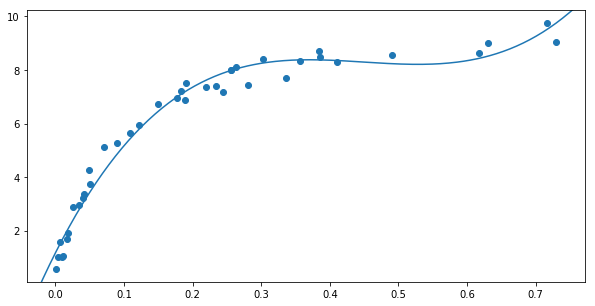

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(X,y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test)
plt.axis(lim)

In [21]:
train_score.shape,test_score.shape

((21, 7), (21, 7))

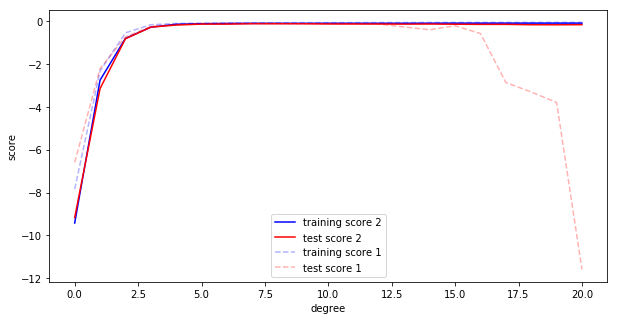

In [22]:
X2,y2 = make_data(100)
train_score2,test_score2 = validation_curve(PolynomialRegression(),X2,y2,
                                           "polynomialfeatures__degree",
                                           degree,cv=7,
                                            scoring="neg_mean_squared_error")
plt.figure(figsize=(10,5))
plt.plot(np.median(train_score2,1),color='blue',label='training score 2')
plt.plot(np.median(test_score2,1),color='red',label='test score 2')
plt.plot(np.median(train_score,1),color='blue',label='training score 1',alpha=0.3,linestyle='dashed')
plt.plot(np.median(test_score,1),color='red',label='test score 1',alpha=0.3,linestyle='dashed')
plt.xlabel('degree')
plt.ylabel('score')
plt.legend(loc='best')

### Learning Curve

In [23]:
from sklearn.learning_curve import learning_curve

def plot_learning_curve(train_size,train_score,val_score):
    plt.plot(train_size,train_score,color='blue',label='training score')
    plt.plot(train_size,val_score,color='red',label='validation score')
    plt.hlines(np.mean([train_score[-1],val_score[-1]]),train_size[0],train_size[-1],
                        color='gray',linestyle='dashed')
    plt.ylim(0,1)
    plt.xlim(train_size[0],train_size[-1])
    plt.xlabel('training size')
    plt.ylabel('score')
    plt.legend(loc='best')

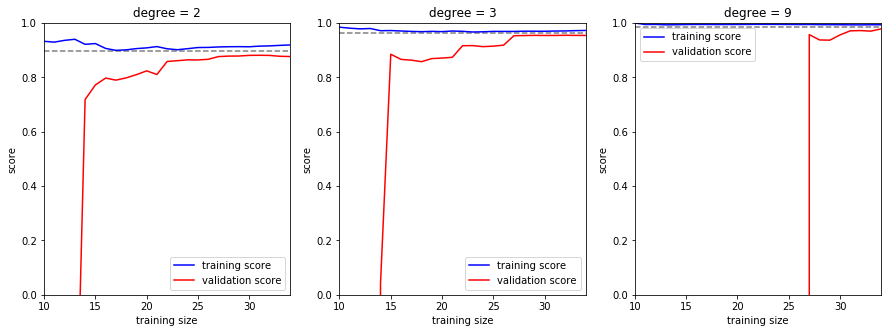

In [24]:
degrees = [2,3,9]
X,y = make_data(40)

plt.figure(figsize=(15,5))
for i,deg in enumerate(degrees):
    train_size,train_score,val_score = learning_curve(PolynomialRegression(deg),
                                                      X,y,cv=7,
                                                      train_sizes=np.linspace(0.3,1,25))    
    plt.subplot(1,len(degrees),i+1)
    plt.title('degree = ' + str(deg))
    plot_learning_curve(train_size,np.mean(train_score,1),np.mean(val_score,1))